In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load The Dataset
In this section, we will load the sales dataset and display its initial structure.

In [31]:
# Load dataset from file
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Check dataset info and statistics
data.info()
data.describe()

First 5 rows of the dataset:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# Data Preprocessing
In this section, we will clean the data by dropping unnecessary columns and handling missing values.

In [32]:
# Data Preprocessing
# Drop columns that are not needed for clustering (e.g., text data)
data_cleaned = data.drop(['ORDERNUMBER', 'ORDERDATE', 'STATUS', 'TERRITORY', 'DEALSIZE'], axis=1)

# Convert categorical columns to numerical values (if necessary)
# Example of one-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Handling missing values
data_cleaned = data_cleaned.dropna()

# Scaling the features (K-Means is sensitive to feature scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Display the scaled data
print("First 5 rows of the scaled dataset:")
print(scaled_data[:5])


First 5 rows of the scaled dataset:
[[-0.52289086  0.5969775  -1.05705871 ... -0.08657163 -0.11204375
  -0.0886247 ]
 [-0.11220131 -0.11445035 -0.34701507 ... -0.08657163 -0.11204375
  -0.0886247 ]
 [ 0.60650538  0.54938372 -1.05705871 ... -0.08657163 -0.11204375
  -0.0886247 ]
 [ 1.01719493 -0.01975856 -0.11033386 ... -0.08657163 -0.11204375
  -0.0886247 ]
 [ 1.42788447  0.81015797  1.78311584 ... -0.08657163 -0.11204375
  -0.0886247 ]]


# Determine Optimal Number of Clusters using the Elbow Method
This section uses the elbow method to find the optimal number of clusters for K-Means.

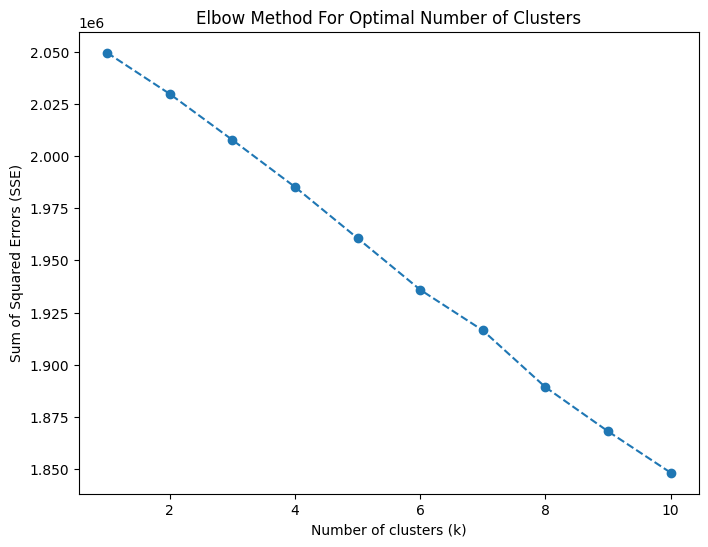

In [33]:
# Use the elbow method to find the optimal number of clusters
sse = []  # Sum of Squared Errors

# Run K-Means for a range of cluster numbers
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the centroids

# Plot the SSE values to visualize the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title("Elbow Method For Optimal Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

# K Means Clustering
In this section, we apply K-Means clustering using the optimal number of clusters determined from the elbow method.

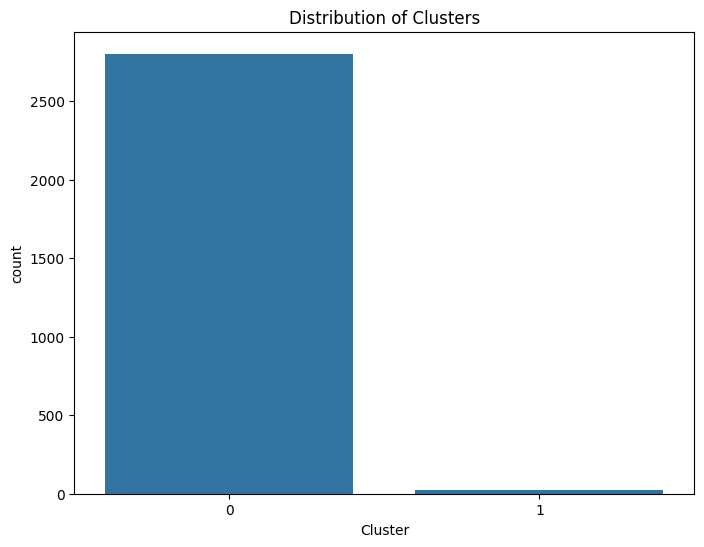

In [34]:
# Choose the optimal number of clusters (k) based on the elbow method
optimal_k = 2  # Example: replace with the value from the elbow plot

# Run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the cluster distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Cluster', data=data)
plt.title("Distribution of Clusters")
plt.show()

# Silhouette Score
We compute the silhouette score to evaluate the clustering performance.

In [35]:
# Compute the silhouette score
score = silhouette_score(scaled_data, data['Cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {score:.2f}")

Silhouette Score for 2 clusters: 0.12


# Hierarchical Clustering
In this section, we perform hierarchical clustering and visualize the results using a dendrogram.

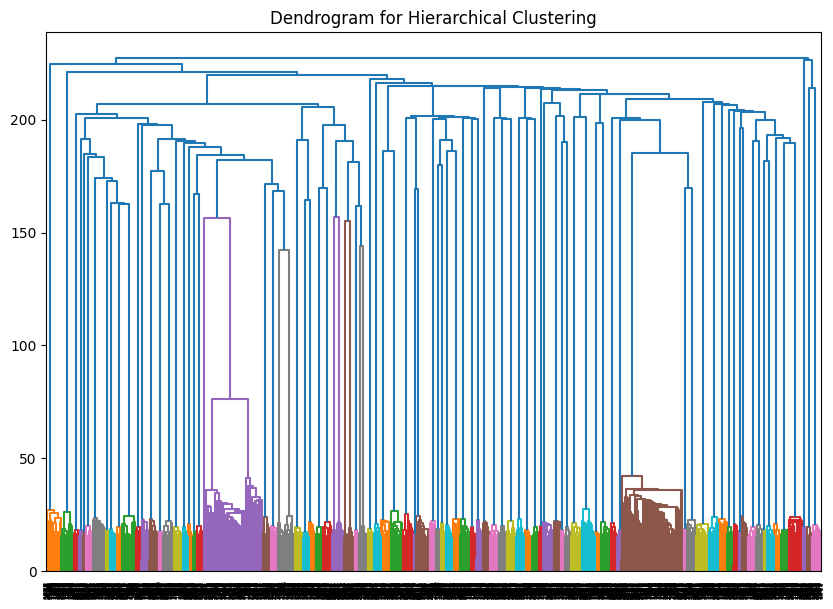

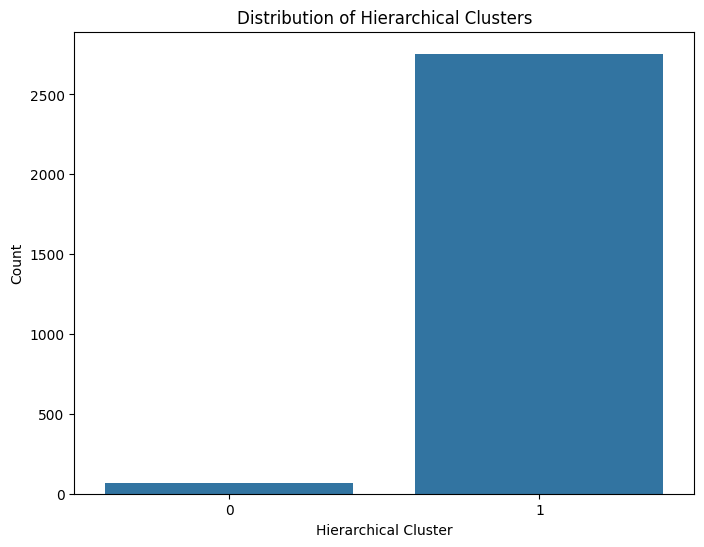

In [36]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'scaled_data' and 'optimal_k' are already defined

# Plot the Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.show()

# Perform hierarchical clustering with the optimal number of clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(scaled_data)

# Visualize the cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Hierarchical_Cluster', data=data)
plt.title("Distribution of Hierarchical Clusters")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("Count")
plt.show()
